## **PCOS Exploratory Data Analysis (EDA)**

In [27]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [49]:
# Load the datset
df=pd.read_csv('Dataset/Cleaned-Data.csv')
df2=pd.read_csv('new_data.csv')    #have encoded + nfeature engineered data

In [50]:
# Information about datset
df.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         173 non-null    object 
 1   Weight_kg                   173 non-null    float64
 2   Height_ft                   173 non-null    float64
 3   Marital_Status              173 non-null    object 
 4   PCOS                        173 non-null    object 
 5   Family_History_PCOS         173 non-null    object 
 6   Menstrual_Irregularity      173 non-null    object 
 7   Hormonal_Imbalance          173 non-null    object 
 8   Hyperandrogenism            173 non-null    object 
 9   Hirsutism                   173 non-null    object 
 10  Mental_Health               173 non-null    object 
 11  Conception_Difficulty       173 non-null    object 
 12  Insulin_Resistance          173 non-null    object 
 13  Diabetes                    173 non

### Prevalence and Demographics

##### Goal : Understand the overall prevalence of PCOS and its distribution across age groups and marital statuses.

In [51]:
# PCOS Prevalence
pcos_counts=df['PCOS'].value_counts()
pcos_percentages = df['PCOS'].value_counts(normalize=True) * 100
print("PCOS Counts",pcos_counts)
print("PCOS %",pcos_percentages)

PCOS Counts PCOS
No                                    134
Yes                                    38
No, Yes, not diagnosed by a doctor      1
Name: count, dtype: int64
PCOS % PCOS
No                                    77.456647
Yes                                   21.965318
No, Yes, not diagnosed by a doctor     0.578035
Name: proportion, dtype: float64


Text(0.5, 1.0, 'PCOS Distribution (Pie Chart)')

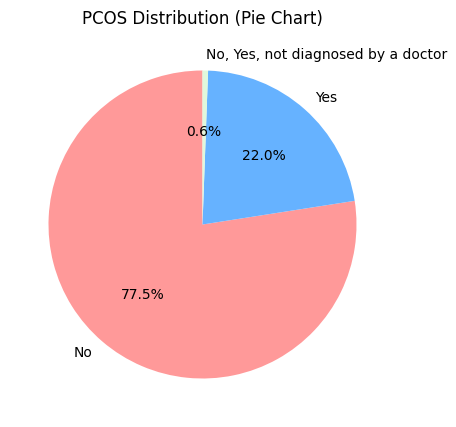

In [52]:
# Pie Chart
fig, ax1 = plt.subplots(figsize=(12, 5))

colors = ['#FF9999', '#66B2FF','#E1F8DC']
ax1.pie(pcos_counts, labels=pcos_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
ax1.set_title('PCOS Distribution (Pie Chart)')


In [53]:
df['Age'].value_counts()

Age
20-25           102
Less than 20     57
45 and above      4
35-44             4
25-30             4
30-35             2
Name: count, dtype: int64

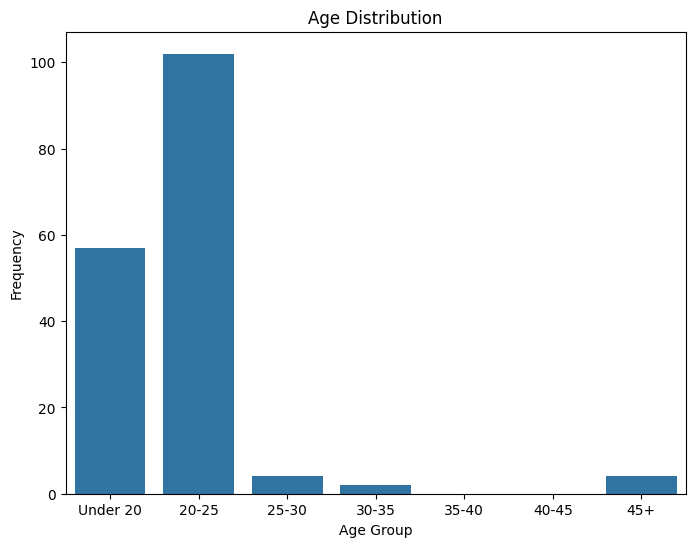

In [54]:
# Convert df['Age'] into categories for proper visualizations 

def categorize_age(Age):
    if Age == 'Less than 20':
        return 'Under 20'
    elif Age == '45 and above':
        return '45+'
    else:
        low, high = map(int, Age.split('-'))
        return f'{low}-{high}'

df['Age_Category'] = df['Age'].apply(categorize_age)

# Plotting with categories:
plt.figure(figsize=(8, 6))
sns.countplot(x='Age_Category', data=df, order=['Under 20','20-25','25-30','30-35','35-40','40-45','45+']) 
plt.title('Age Distribution')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.show()


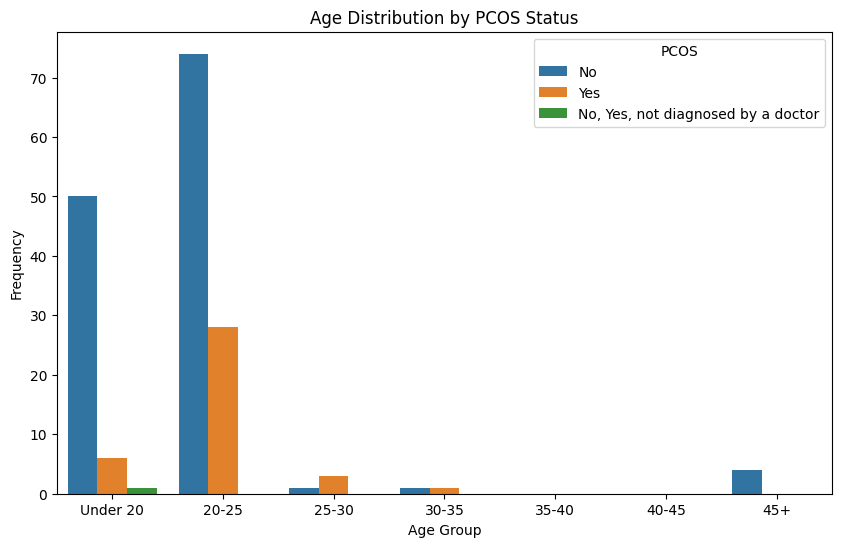

In [55]:
# With PCOS
plt.figure(figsize=(10, 6))
sns.countplot(x='Age_Category', hue='PCOS', data=df, order=['Under 20','20-25','25-30','30-35','35-40','40-45','45+'])
plt.title('Age Distribution by PCOS Status')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.show()


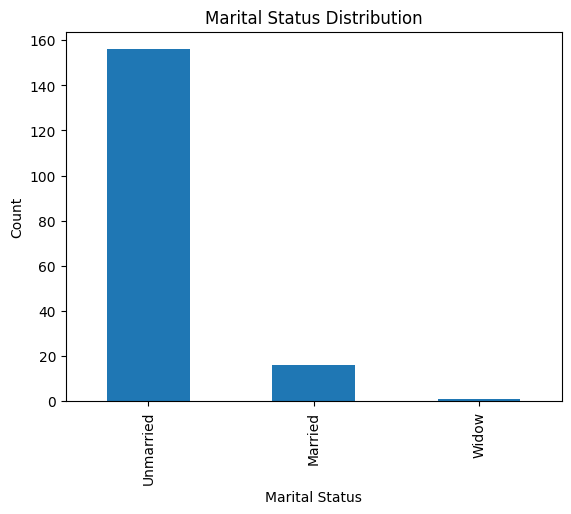

In [56]:
#Marital Status Visualisation

df['Marital_Status'].value_counts().plot(kind='bar')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Marital Status Distribution')
plt.show()


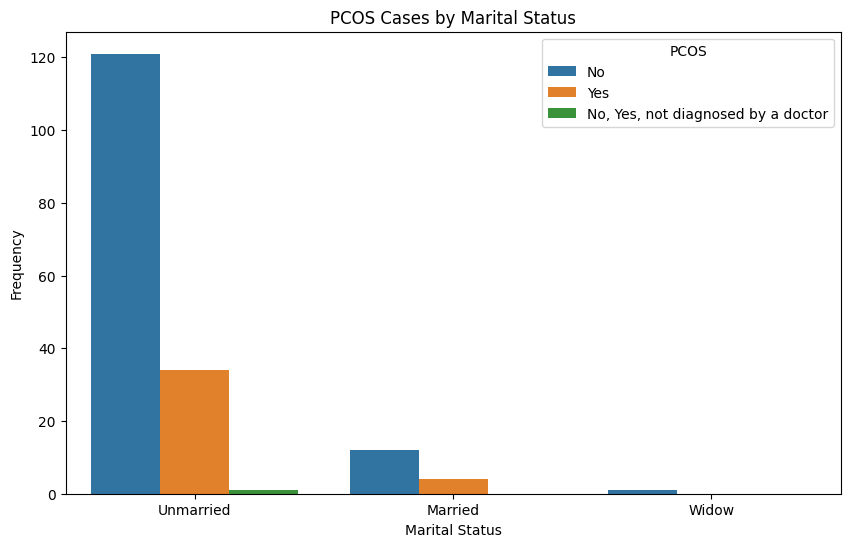

In [57]:
# Marital Status With PCOS
plt.figure(figsize=(10, 6))
sns.countplot(x='Marital_Status', hue='PCOS', data=df)
plt.title('PCOS Cases by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.show()

### Symptoms Relationships

##### Goal: Explore how different symptoms relate to each other.

In [58]:
# Symptom Columns
symptom_cols = ['Family_History_PCOS', 'Menstrual_Irregularity', 'Hormonal_Imbalance','Hyperandrogenism', 'Hirsutism', 'Mental_Health', 'Conception_Difficulty']

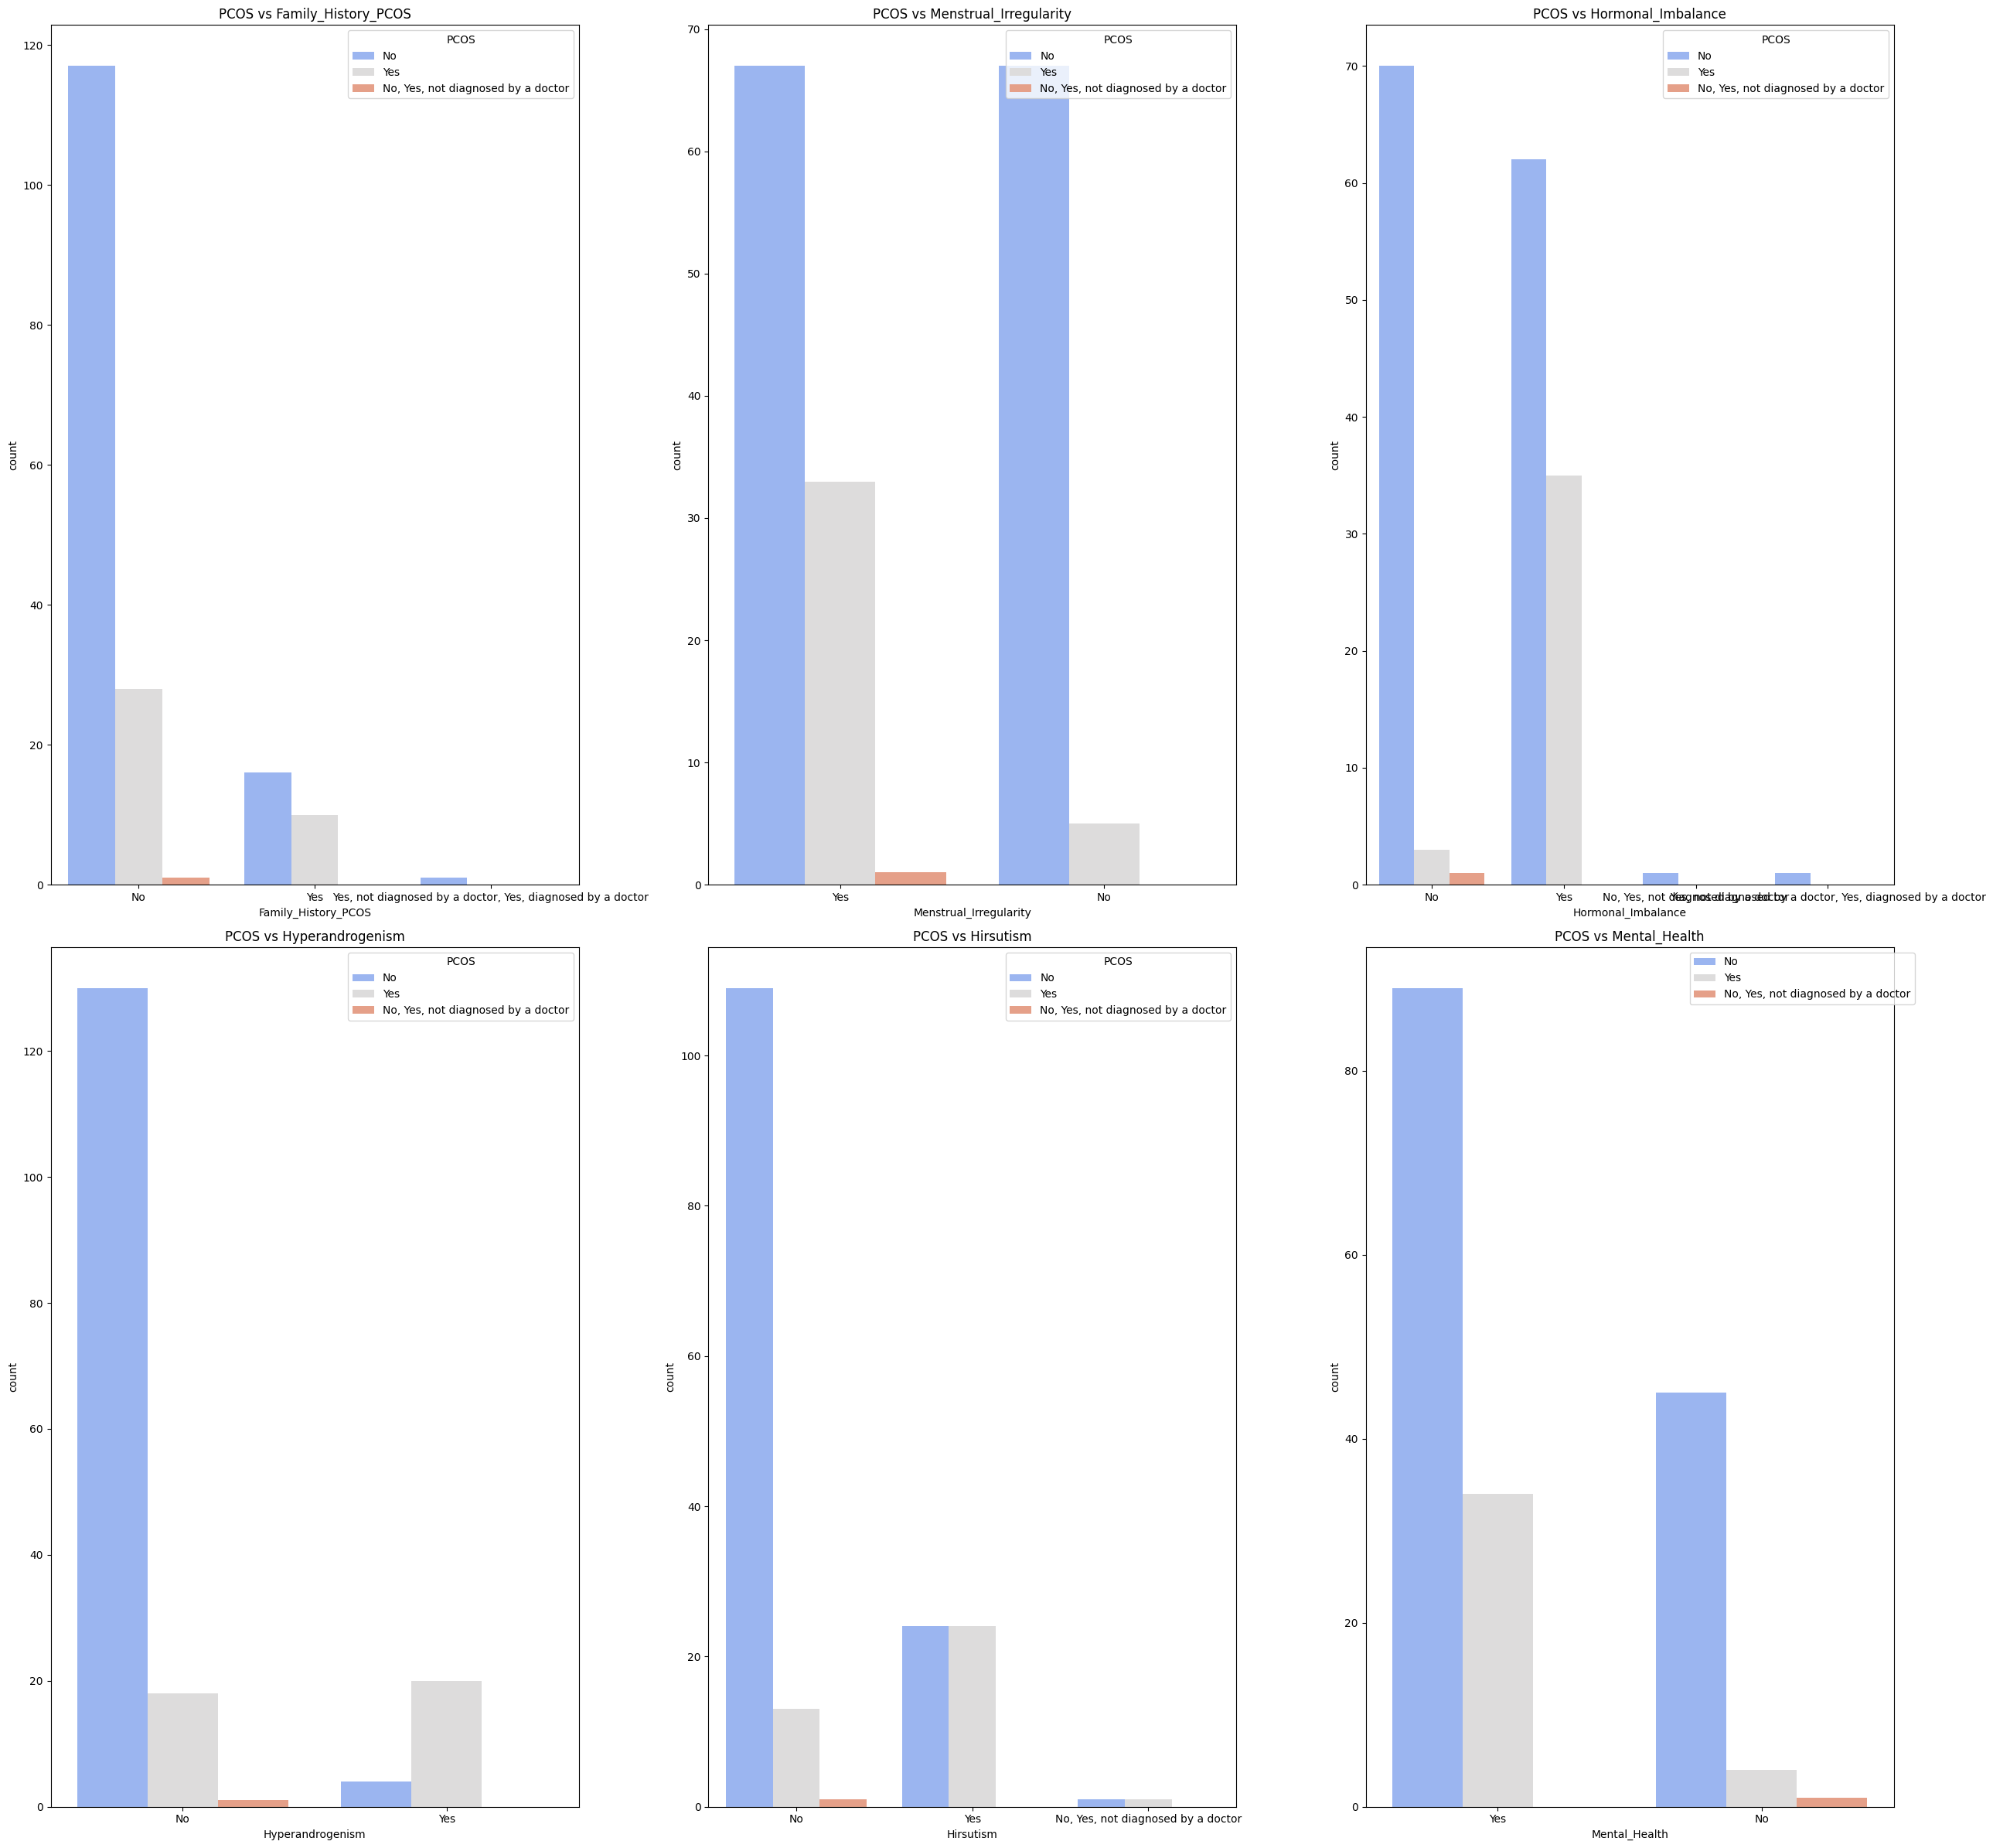

In [59]:
# Creating a stacked bar plot
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(26, 24))

for i in range(min(len(symptom_cols), 2 * 3)):
    col = symptom_cols[i]
    ax = axes[i//3, i%3]
    sns.countplot(data=df, x=col, hue='PCOS', palette="coolwarm", ax=ax)
    ax.set_title(f'PCOS vs {col}')
    
    
plt.tight_layout()
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper right')
plt.show()


In [60]:
# Contingency tables for each symptom
contingency_tables = {}
for symptom in symptom_cols:
    contingency_tables[symptom] = pd.crosstab(
        index=df['PCOS'],
        columns=df[symptom],
        margins=True,  
    )
    
    print(f"\nContingency Table for {symptom}:")
    print(contingency_tables[symptom])



Contingency Table for Family_History_PCOS:
Family_History_PCOS                  No  Yes  \
PCOS                                           
No                                  117   16   
No, Yes, not diagnosed by a doctor    1    0   
Yes                                  28   10   
All                                 146   26   

Family_History_PCOS                 Yes, not diagnosed by a doctor, Yes, diagnosed by a doctor  \
PCOS                                                                                             
No                                                                                  1            
No, Yes, not diagnosed by a doctor                                                  0            
Yes                                                                                 0            
All                                                                                 1            

Family_History_PCOS                 All  
PCOS                                

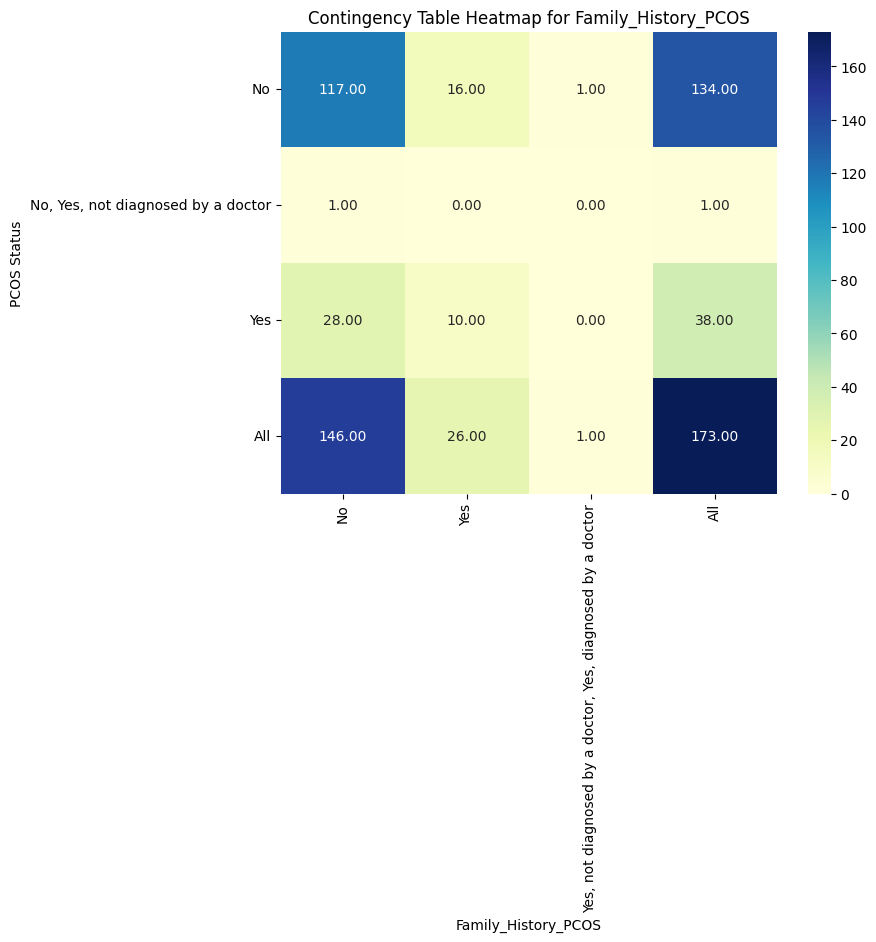

<Figure size 640x480 with 0 Axes>

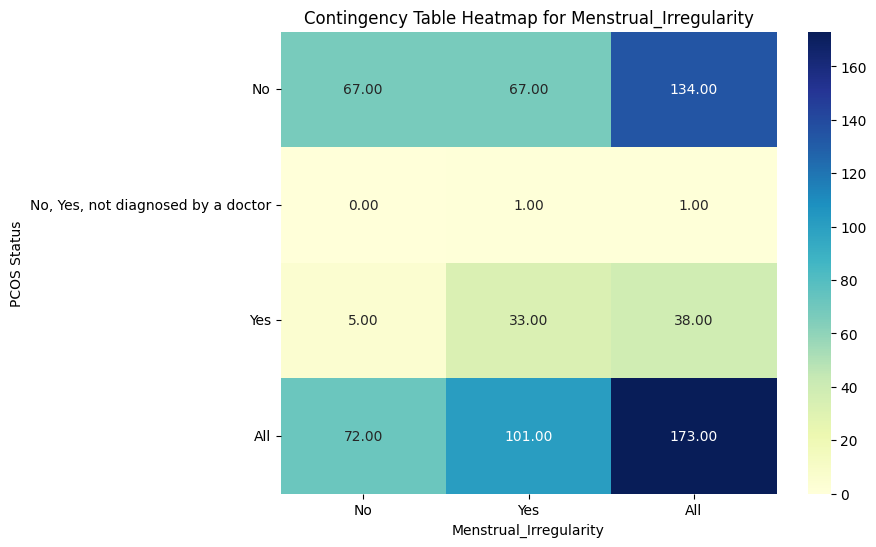

<Figure size 640x480 with 0 Axes>

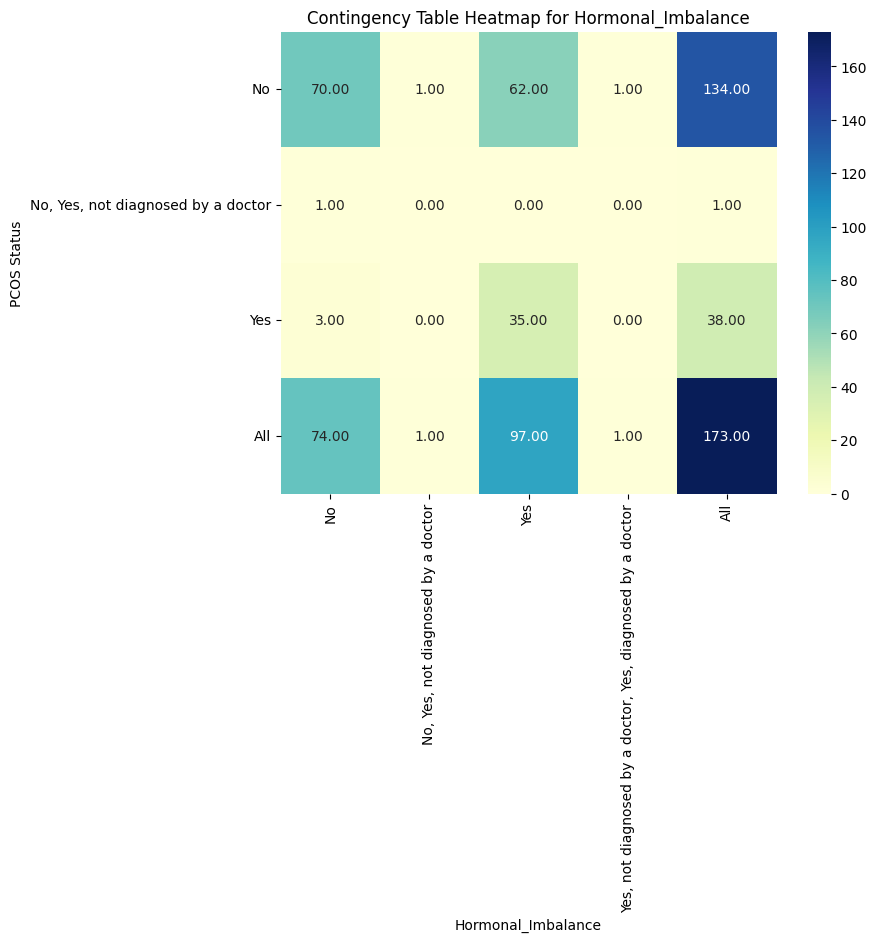

<Figure size 640x480 with 0 Axes>

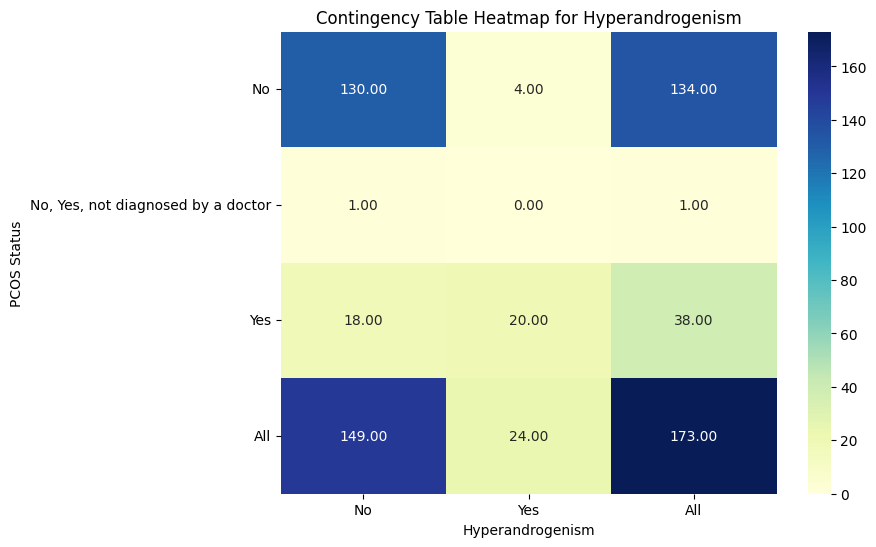

<Figure size 640x480 with 0 Axes>

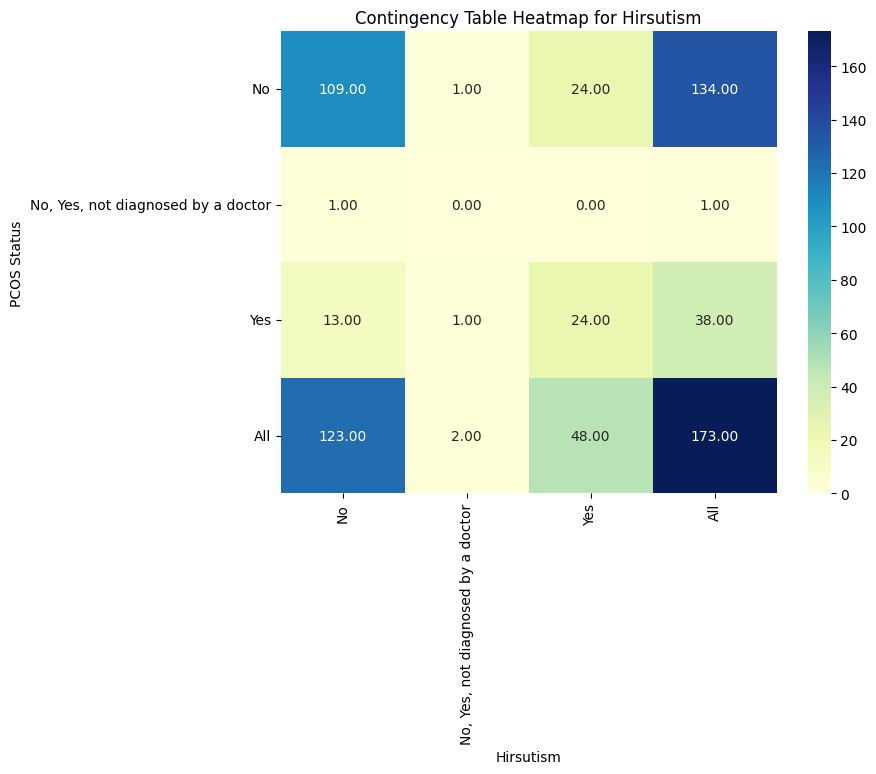

<Figure size 640x480 with 0 Axes>

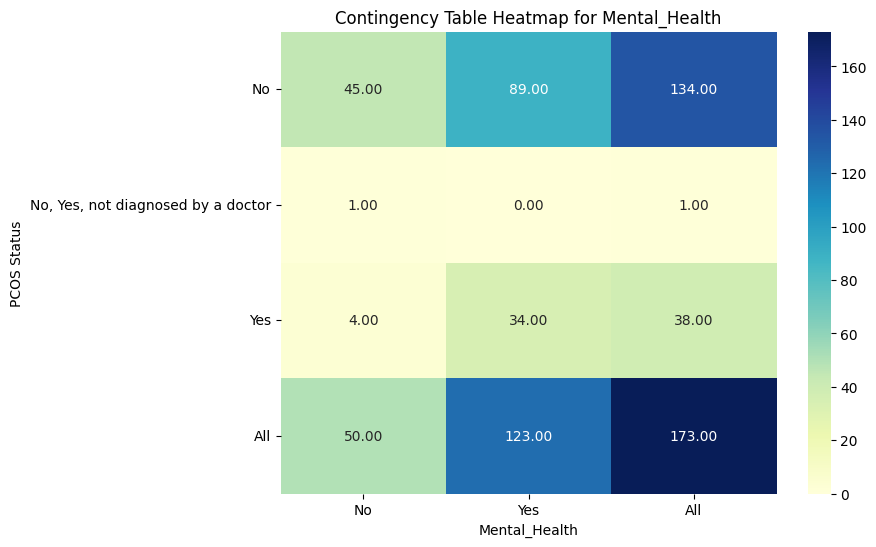

<Figure size 640x480 with 0 Axes>

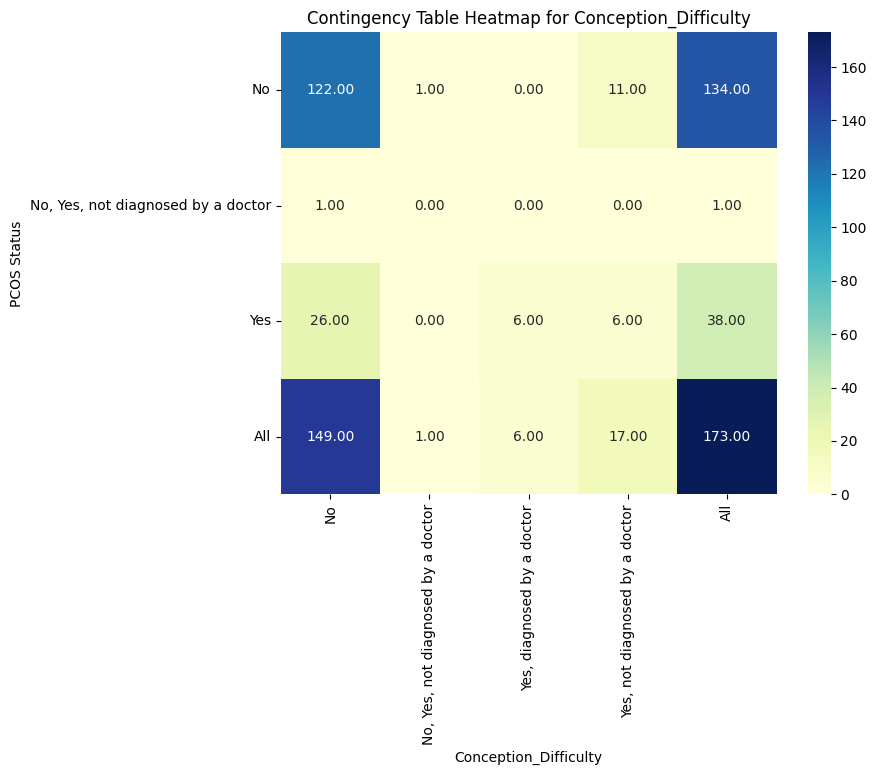

<Figure size 640x480 with 0 Axes>

In [61]:
# Heatmaps for Contigency Tables
for symptom, table in contingency_tables.items():
    plt.figure(figsize=(8, 6))  
    sns.heatmap(table, annot=True, cmap="YlGnBu", fmt=".2f") 
    plt.title(f'Contingency Table Heatmap for {symptom}')
    plt.xlabel(symptom)
    plt.ylabel('PCOS Status')
    plt.show()
    plt.tight_layout()

### Height , Weight and PCOS

##### Goal : How Height and Weight is related to PCOS ? 

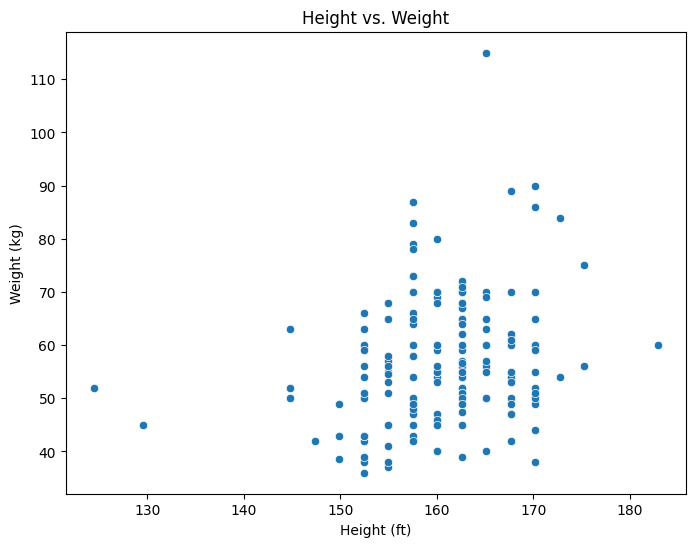

In [62]:
# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Height_ft', y='Weight_kg', data=df)
plt.title('Height vs. Weight')
plt.xlabel('Height (ft)')
plt.ylabel('Weight (kg)')
plt.show()

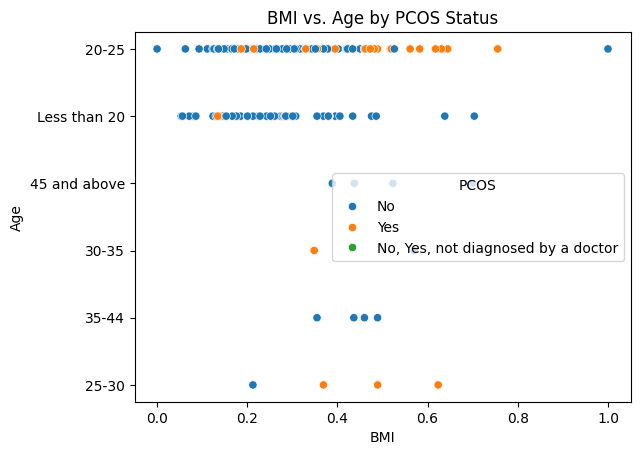

<Figure size 640x480 with 0 Axes>

In [66]:
# Scatter Plot with BMI vs Age by PCOS Status 
sns.scatterplot(x='BMI', y='Age',hue='PCOS', data=df2) 
plt.title('BMI vs. Age by PCOS Status')
plt.xlabel('BMI')
plt.ylabel('Age')
plt.show()
plt.tight_layout()
ax.legend(bbox_to_anchor=(0.5, 1.2),loc='upper left')

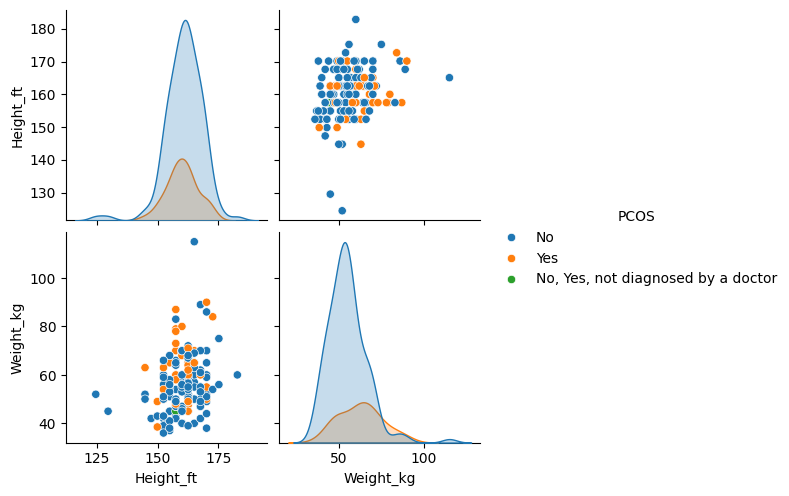

In [67]:
# Pair Plot 
sns.pairplot(df[['Height_ft', 'Weight_kg', 'PCOS']], hue='PCOS') 
plt.show()

### Lifestyle Features

##### Goal : How different factors such as Diet , Exercise and Sleep affcet PCOS ? 

##### Diet Score vs PCOS

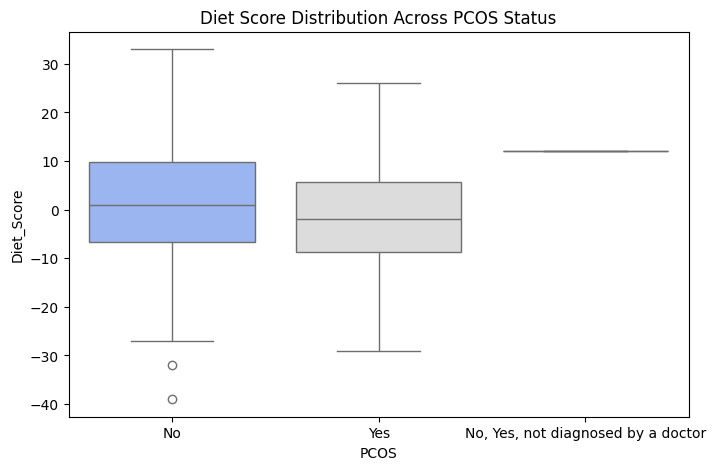

In [68]:
# Diet Score

plt.figure(figsize=(8, 5))
sns.boxplot(data=df2, x='PCOS', y='Diet_Score', hue='PCOS',palette="coolwarm")
plt.title('Diet Score Distribution Across PCOS Status')
plt.show()


##### Exercise Score vs PCOS

C:\Users\dell\AppData\Local\Temp\ipykernel_1492\3754746487.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df2, x='PCOS', y='Exercise_Score', palette="coolwarm")


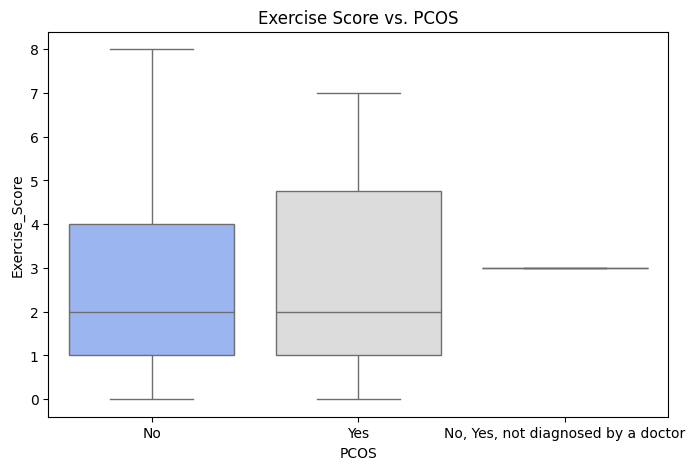

In [69]:
# Exercise Score
plt.figure(figsize=(8, 5))
sns.boxplot(data=df2, x='PCOS', y='Exercise_Score', palette="coolwarm")
plt.title('Exercise Score vs. PCOS')
plt.show()


##### Sleep Score vs PCOS

C:\Users\dell\AppData\Local\Temp\ipykernel_1492\769793.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df2, x='PCOS', y='Sleep_Score', palette="coolwarm")


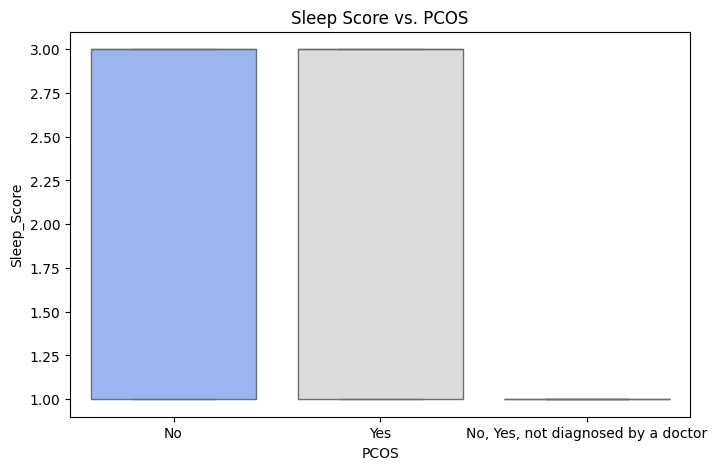

In [70]:
# Sleep Score
plt.figure(figsize=(8, 5))
sns.boxplot(data=df2, x='PCOS', y='Sleep_Score', palette="coolwarm")
plt.title('Sleep Score vs. PCOS')
plt.show()


### Childhood Trauma

##### Goal: Explore the potential link between childhood trauma and PCOS.

In [71]:
pd.crosstab(df['Childhood_Trauma'],df['PCOS'])

PCOS,No,"No, Yes, not diagnosed by a doctor",Yes
Childhood_Trauma,,,
No,92,1,13
"No, Yes, not diagnosed by a doctor",0,0,2
Yes,42,0,23


Text(0, 0.5, 'Count')

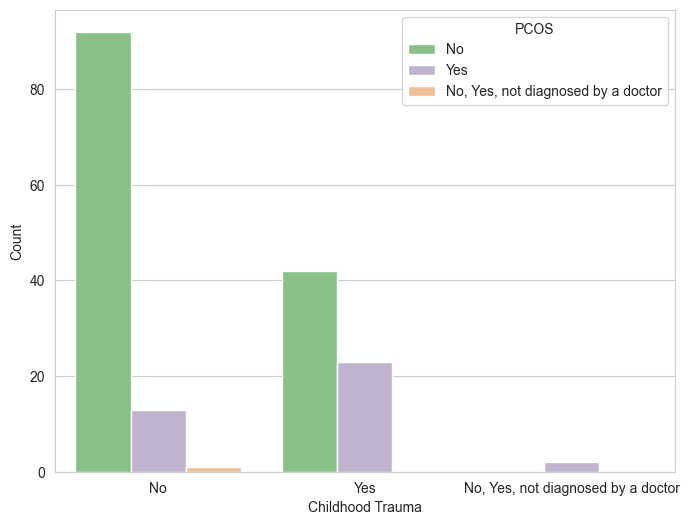

In [72]:
#Countplot for childhood trauma and PCOS
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
sns.set_palette("Accent")
sns.countplot(x="Childhood_Trauma", hue="PCOS", data=df)
plt.xlabel('Childhood Trauma')
plt.ylabel('Count')


##### Chi Square Test between 'Exercise_Benefit' and 'PCOS'

In [73]:
from scipy.stats import chi2_contingency  
chi2_contingency(pd.crosstab(df['Exercise_Benefit'], df['PCOS']))  


Chi2ContingencyResult(statistic=np.float64(8.951465250570143), pvalue=np.float64(0.1763260869596122), dof=6, expected_freq=array([[13.94219653,  0.10404624,  3.95375723],
       [14.71676301,  0.10982659,  4.1734104 ],
       [85.20231214,  0.63583815, 24.16184971],
       [20.13872832,  0.15028902,  5.71098266]]))

##### Cramer's V Correlation Coefficient 

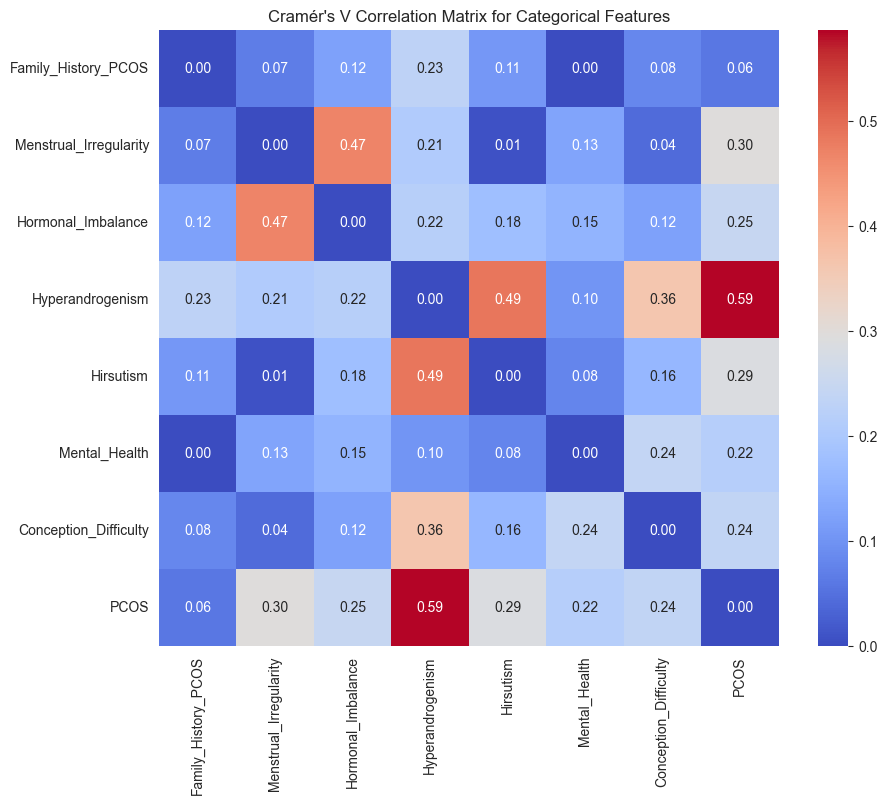

In [74]:
import scipy.stats as stats

def cramers_v(x, y):
    """Calculate Cramér's V statistic for categorical-categorical association."""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min(r_corr-1, k_corr-1))

# Cramér's V for categorical columns
cat_columns = symptom_cols + ['PCOS']
cramers_matrix = pd.DataFrame(np.zeros((len(cat_columns), len(cat_columns))), index=cat_columns, columns=cat_columns)

for col1 in cat_columns:
    for col2 in cat_columns:
        if col1 != col2:
            cramers_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

plt.figure(figsize=(10, 8))
sns.heatmap(cramers_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Cramér's V Correlation Matrix for Categorical Features")
plt.show()



# 📊 **Key Insights from PCOS Analysis**  

### 🔍 **1. PCOS Prevalence**  
- **📌 22%** of the patients in our dataset have PCOS.  
- 🧑‍⚕️ **Most affected age group:** **20-25 years**.  
- 💍 **Marital Status:** PCOS is more commonly diagnosed in **unmarried women**.  



### ⚠️ **2. Key Symptoms of PCOS**  
- **Top 3 most frequent symptoms:**  
  ✅ **Menstrual Irregularity**  
  ✅ **Hormonal Imbalance**  
  ✅ **Hirsutism (excessive hair growth)**  
- 🔬 **Other notable symptoms:**  
  - **Hyperandrogenism** (high male hormone levels)  
  - **Mental health issues**  



### 📉 **3. PCOS & BMI (Body Mass Index)**  
- 📊 Women with **higher BMI** show a potential association with PCOS.  
- 📅 However, **BMI does not correlate significantly with age**.  



### 🏋️‍♀️ **4. Lifestyle Factors & PCOS**  
- 🍽️ **Diet Patterns:**  
  - Women without PCOS tend to have **healthier and more consistent** dietary habits.  
  - Women with PCOS show **lower and more variable diet scores**.  
- 🚴 **Exercise Levels:**  
  - PCOS patients **exercise less** compared to those without PCOS.  
- 😴 **Sleep Quality:**  
  - Sleep quality appears to be **lower** among those diagnosed or suspected of having PCOS.  



### 💔 **5. Childhood Trauma & PCOS**  
- 🧠 While most participants **report no childhood trauma**, those who **have experienced trauma** are **more likely to have or suspect PCOS**.  



### 🏃‍♀️ **6. Exercise & PCOS Management**  
- ❌ **No strong link** was found between **exercise benefits and PCOS**.  
- ⚖️ While exercise is beneficial for overall health, its impact on **PCOS symptoms remains unclear**.  



### 📊 **7. Cramer's V Analysis (Correlation Strengths)**  
- **Strong associations:**  
  🔗 **PCOS ↔ Hyperandrogenism, Menstrual Irregularity, Hormonal Imbalance**  
- **Moderate associations:**  
  🔗 **PCOS ↔ Hirsutism, Conception Difficulty, Mental Health Issues**  
- **Weak association:**  
  🔗 **PCOS ↔ Family history of PCOS**  



